0.24


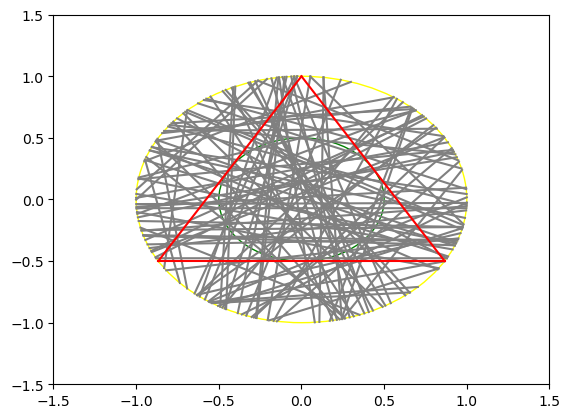

In [6]:
import numpy as np
import matplotlib.pyplot as plt


NUM_CHORDS = 100
RADIUS = 1
TAU = 2*np.pi

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim((-RADIUS-.5,RADIUS+.5))
ax.set_ylim((-RADIUS-.5,RADIUS+.5))
circ = plt.Circle((0, 0), radius=1, edgecolor='yellow', facecolor='None')
circ2 = plt.Circle((0, 0), radius=0.5, edgecolor='green', facecolor='None')
ax.add_patch(circ)
ax.add_patch(circ2)

A = [0, 1]
B = [np.sqrt(3)/2, -1/2]
C = [-np.sqrt(3)/2, -1/2]

def edge_points(xp: float, yp: float, m: float) -> [[float, float], [float, float]]:
    m2: float = m*m

    first: float = xp * m2 - yp * m
    rad: float = np.sqrt(- ((xp*xp) * m2) + (2 * xp * yp * m) - (yp*yp) + m2 + 1)
    num: float = float(1 + m2)

    x1: float = (first + rad) / num
    x2: float = (first - rad) / num

    y1: float = m * (x1 - xp) + yp
    y2: float = m * (x2 - xp) + yp

    return [[x1,y1], [x2,y2]]


"""
random endpoints methods
"""
def sol1():
    alpha, beta = np.random.random()*TAU, np.random.random()*TAU

    x = [np.cos(alpha), np.sin(alpha)]
    y = [np.cos(beta), np.sin(beta)]

    a = x
    bx = np.cos(alpha + TAU/3)
    by = np.sin(alpha + TAU/3)

    cx = np.cos(alpha + 2/3*TAU)
    cy = np.sin(alpha + 2/3*TAU)

    # plt.plot([a[0], bx], [a[1], by], 'red')  # AB
    # plt.plot([cx, bx], [cy, by], 'red')  # CB
    # plt.plot([cx, a[0]], [cy, a[1]], 'red')  # AC

    plt.plot([x[0], y[0]], [x[1], y[1]], 'grey')

    if TAU/3 < alpha < 2/3*TAU:
        if beta > (alpha + TAU/3) % TAU or beta < (alpha + 2/3*TAU) % TAU:
            return 1
        else:
            return 0
    else:
        if (alpha + TAU/3) % TAU < beta % TAU < (alpha + 2/3*TAU) % TAU:
            return 1
        else:
            return 0


"""
random radial point
"""
def sol2():
    alpha = np.random.random() * TAU
    r = [np.cos(alpha), np.sin(alpha)]

    beta = alpha + np.pi
    a = [np.cos(beta), np.sin(beta)]

    sigma = beta + TAU / 3
    b = [np.cos(sigma), np.sin(sigma)]

    epsilon = sigma + TAU / 3
    c = [np.cos(epsilon), np.sin(epsilon)]

    # plt.plot([0, r[0]], [0, r[1]], 'grey')  # or

    # plt.plot([a[0], b[0]], [a[1], b[1]], 'red')  # ab
    # plt.plot([b[0], c[0]], [b[1], c[1]], 'red')  # bc
    # plt.plot([a[0], c[0]], [a[1], c[1]], 'red')  # ac

    slope = r[1] / r[0]
    p_slope: float = -1.0 / slope

    point_x = np.random.random() * r[0]
    point_y = point_x * r[1] / r[0]

    a, b = edge_points(point_x, point_y, p_slope)

    plt.plot([b[0], a[0]], [b[1], a[1]], 'grey')

    if point_x**2 + point_y**2 < (RADIUS/2)**2:
        return 1
    return 0

"""
random midpoint
"""
def sol3():
    alpha = np.random.uniform() * TAU
    r = [np.cos(alpha), np.sin(alpha)]

    point_x = np.sqrt(np.random.random()) * np.random.random() * r[0]
    point_y = point_x * r[1] / r[0]

    slope = r[1] / r[0]
    p_slope: float = -1.0 / slope

    a, b = edge_points(point_x, point_y, p_slope)

    # plt.plot([1, point_x], [1, point_y], 'blue')
    plt.plot([b[0], a[0]], [b[1], a[1]], 'grey')

    if point_x**2 + point_y**2 < 0.5**2:
        return 0
    else:
        return 1


# sol2()

sum_avg = 0.0
for _ in range(NUM_CHORDS):
    sum_avg += sol1()

print(sum_avg / NUM_CHORDS)

plt.plot([A[0], B[0]], [A[1], B[1]], 'red')  # AB
plt.plot([C[0], B[0]], [C[1], B[1]], 'red')  # CB
plt.plot([C[0], A[0]], [C[1], A[1]], 'red')  # AC

plt.show()